Info:{'lives': 3, 'episode_frame_number': 4, 'frame_number': 4}
Frame 1:


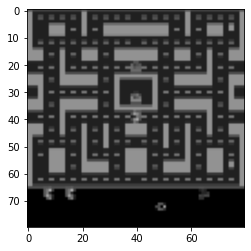

Frame 2:


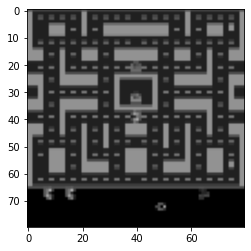

Frame 3:


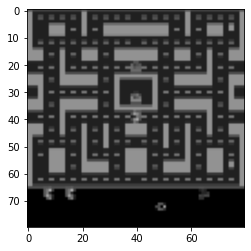

Frame 4:


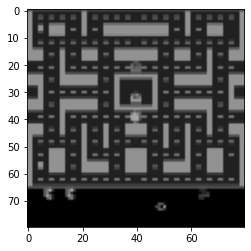

In [5]:
import gym
import time
import matplotlib.pyplot as plt
env = gym.make("ALE/MsPacman-v5",obs_type="grayscale",render_mode="rgb_array")

#resized observeration
env = gym.wrappers.ResizeObservation(env, (80, 80))

#stacked 4 frames (not sure how it works)
env = gym.wrappers.FrameStack(env, 4)
env.reset()

#another resized observation
action = env.action_space.sample()
new_state, reward, is_done, truncated,info=env.step(1)


print(f"Info:{info}")
print(f"Frame 1:")
plt.imshow(new_state[0],cmap='gray', vmin=0, vmax=255)
plt.show()
print(f"Frame 2:")
plt.imshow(new_state[1],cmap='gray', vmin=0, vmax=255)
plt.show()
print(f"Frame 3:")
plt.imshow(new_state[2],cmap='gray', vmin=0, vmax=255)
plt.show()
print(f"Frame 4:")
plt.imshow(new_state[3],cmap='gray', vmin=0, vmax=255)
plt.show()

In [6]:
import gym
import time
env = gym.make("ALE/MsPacman-v5",obs_type="grayscale",render_mode="rgb_array")

#resized observeration
env = gym.wrappers.ResizeObservation(env, (80, 80))

#stacked 4 frames (not sure how it works)
env = gym.wrappers.FrameStack(env, 4)
env.reset()

frame_time = 1.0 / 15 # seconds
n_episodes = 1
 
for i_episode in range(n_episodes):
    t=0
    score=0
    then = 0
    done = False
    env.reset()
    while not done:
        now = time.time()
        if frame_time < now - then:
            action = env.action_space.sample()
            observation, reward, done,_, info = env.step(action)
            score += reward
            then = now
            t=t+1
            print(score)
            print(info)
    print('Episode {} finished at t {} with score {}'.format(i_episode,
                                                             t,score))

0.0
{'lives': 3, 'episode_frame_number': 4, 'frame_number': 4}
0.0
{'lives': 3, 'episode_frame_number': 8, 'frame_number': 8}
0.0
{'lives': 3, 'episode_frame_number': 12, 'frame_number': 12}
0.0
{'lives': 3, 'episode_frame_number': 16, 'frame_number': 16}
0.0
{'lives': 3, 'episode_frame_number': 20, 'frame_number': 20}
0.0
{'lives': 3, 'episode_frame_number': 24, 'frame_number': 24}
0.0
{'lives': 3, 'episode_frame_number': 28, 'frame_number': 28}
0.0
{'lives': 3, 'episode_frame_number': 32, 'frame_number': 32}
0.0
{'lives': 3, 'episode_frame_number': 36, 'frame_number': 36}
0.0
{'lives': 3, 'episode_frame_number': 40, 'frame_number': 40}
0.0
{'lives': 3, 'episode_frame_number': 44, 'frame_number': 44}
0.0
{'lives': 3, 'episode_frame_number': 48, 'frame_number': 48}
0.0
{'lives': 3, 'episode_frame_number': 52, 'frame_number': 52}
0.0
{'lives': 3, 'episode_frame_number': 56, 'frame_number': 56}
0.0
{'lives': 3, 'episode_frame_number': 60, 'frame_number': 60}
0.0
{'lives': 3, 'episode_fra

KeyboardInterrupt: 